In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [ ]:
# Paths
train_dir = '/content/drive/MyDrive/InceptionNet_Milestone02/train'
test_dir = '/content/drive/MyDrive/InceptionNet_Milestone02/test'

# **Model Training**

In [ ]:
# Parameters
batch_size = 32
img_height = 299
img_width = 299
num_classes = 5  # Number of classes in the dataset

# Data generators with augmentation for training and only rescaling for validation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load the images in batches from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important for correct prediction later
)

# Load InceptionV3 pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freezing the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding custom layers
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Keeping epochs low for demonstration; usually, it should be higher
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Evaluating the model on the test set
eval_result = model.evaluate(test_generator)
eval_result

Found 2500 images belonging to 5 classes.
Found 250 images belonging to 5 classes.
Epoch 1/10
79/79 [==============================] - 752s 9s/step - loss: 1.3841 - accuracy: 0.5264 - val_loss: 0.3256 - val_accuracy: 0.9000
Epoch 2/10
79/79 [==============================] - 766s 10s/step - loss: 0.8021 - accuracy: 0.6896 - val_loss: 0.2641 - val_accuracy: 0.9160
Epoch 3/10
79/79 [==============================] - 771s 10s/step - loss: 0.7173 - accuracy: 0.7228 - val_loss: 0.2818 - val_accuracy: 0.9040
Epoch 4/10
79/79 [==============================] - 775s 10s/step - loss: 0.6961 - accuracy: 0.7356 - val_loss: 0.3217 - val_accuracy: 0.8800
Epoch 5/10
79/79 [==============================] - 777s 10s/step - loss: 0.6625 - accuracy: 0.7412 - val_loss: 0.2563 - val_accuracy: 0.9240
Epoch 6/10
79/79 [==============================] - 782s 10s/step - loss: 0.6433 - accuracy: 0.7600 - val_loss: 0.2565 - val_accuracy: 0.9040
Epoch 7/10
79/79 [==============================] - 759s 10s/step 

[0.23560580611228943, 0.9240000247955322]

# **Plotting Training and Testing Accuracy and Loss**

In [1]:
import matplotlib.pyplot as plt

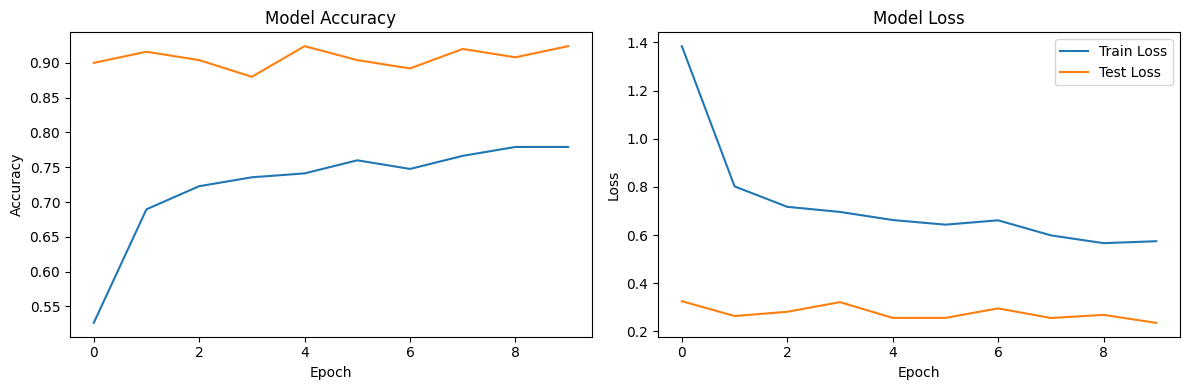

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()